In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Regressão

In [6]:
df = pd.read_csv('municipios.csv')

In [7]:
pd.set_option('display.max_columns', None)
df.head()

,id_municipio,ano,expectativa_vida,fecundidade_total,mortalidade_1,mortalidade_5,razao_dependencia,prob_sobrevivencia_40,prob_sobrevivencia_60,taxa_envelhecimento,expectativa_anos_estudo,taxa_analfabetismo_11_a_14,taxa_analfabetismo_15_a_17,taxa_analfabetismo_15_mais,taxa_analfabetismo_18_a_24,taxa_analfabetismo_18_mais,taxa_analfabetismo_25_a_29,taxa_analfabetismo_25_mais,taxa_atraso_0_basico,taxa_atraso_0_fundamental,taxa_atraso_0_medio,taxa_atraso_1_basico,taxa_atraso_1_fundamental,taxa_atraso_1_medio,taxa_atraso_2_basico,taxa_atraso_2_fundamental,taxa_atraso_2_medio,taxa_freq_bruta_basico,taxa_freq_bruta_fundamental,taxa_freq_bruta_medio,taxa_freq_bruta_pre,taxa_freq_bruta_superior,taxa_freq_liquida_basico,taxa_freq_liquida_fundamental,taxa_freq_liquida_medio,taxa_freq_liquida_pre,taxa_freq_liquida_superior,taxa_freq_0_3,taxa_freq_11_14,taxa_freq_15_17,taxa_freq_18_24,taxa_freq_25_29,taxa_freq_4_5,taxa_freq_4_6,taxa_freq_5_6,taxa_freq_6,taxa_freq_6_14,taxa_freq_6_17,taxa_freq_fundamental_15_17,taxa_freq_fundamental_18_24,taxa_freq_fundamental_4_5,taxa_freq_medio_18_24,taxa_freq_medio_6_14,taxa_freq_superior_15_17,taxa_fundamental_11_13,taxa_fundamental_12_14,taxa_fundamental_15_17,taxa_fundamental_16_18,taxa_fundamental_18_24,taxa_fundamental_18_mais,taxa_fundamental_25_mais,taxa_medio_18_20,taxa_medio_18_24,taxa_medio_18_mais,taxa_medio_19_21,taxa_medio_25_mais,taxa_superior_25_mais,renda_pc_max_quintil_1,renda_pc_max_quintil_2,renda_pc_max_quintil_3,renda_pc_max_quintil_4,renda_pc_max_decil_9,indice_gini,prop_pobreza_extrema,prop_pobreza_extrema_criancas,prop_pobreza,prop_pobreza_criancas,prop_vulner_pobreza,prop_vulner_pobreza_criancas,prop_renda_10_ricos,prop_renda_20_pobres,prop_renda_20_ricos,prop_renda_40_pobres,prop_renda_60_pobres,prop_renda_80_pobres,prop_renda_trabalho,razao_10_ricos_40_pobres,razao_20_ricos_40_pobres,renda_pc,renda_pc_quintil_1,renda_pc_decil_10,renda_pc_quintil_2,renda_pc_quintil_3,renda_pc_quintil_4,renda_pc_quintil_5,renda_pc_exc_renda_nula,renda_pc_pobreza_extrema,renda_pc_pobreza,renda_pc_vulner_pobreza,indice_theil,prop_trabalhadores_conta_proria,prop_empregadores,prop_ocupados_agropecuaria,prop_ocupados_comercio,prop_ocupados_construcao,prop_ocupados_extracao,prop_ocupados_formalizacao,prop_ocupados_fundamental,prop_ocupados_medio,prop_ocupados_servicos,prop_ocupados_siup,prop_ocupados_superior,prop_ocupados_transformacao,prop_ocupados_renda_0,prop_ocupados_renda_1_sm,prop_ocupados_renda_2_sm,prop_ocupados_renda_3_sm,prop_ocupados_renda_5_sm,renda_media_ocupados,taxa_atividade,taxa_atividade_10_14,taxa_atividade_15_17,taxa_atividade_18_24,taxa_atividade_18_mais,taxa_atividade_25_29,taxa_desocupacao,taxa_desocupacao_10_14,taxa_desocupacao_15_17,taxa_desocupacao_18_24,taxa_desocupacao_18_mais,taxa_desocupacao_25_29,indice_treil_trabalho,taxa_ocupados_carteira,taxa_ocupados_setor_publico,taxa_ocupados_sem_carteira,taxa_agua_encanada,taxa_banheiro_agua_encanada,taxa_densidade_2_mais,taxa_coleta_lixo,taxa_energia_eletrica,taxa_agua_esgoto_inadequados,taxa_paredes_inadequados,taxa_criancas_dom_sem_fund,taxa_criancas_fora_escola_4_5,taxa_criancas_fora_escola_6_14,taxa_dom_sem_fund,taxa_dom_vulner_sem_fund,taxa_sem_fund_informal,taxa_mulheres_com_filho_10_14,taxa_mulheres_com_filho_15_17,taxa_mulheres_chefe_filho_15m,taxa_nest_ntrab_vulner_15_24,taxa_vulner_desloc_1_hora,taxa_dom_vulner_dep_idoso,taxa_sem_energia_eletrica,populacao_homens_0_4,populacao_homens_10_14,populacao_homens_15_19,populacao_homens_20_24,populacao_homens_25_29,populacao_homens_30_34,populacao_homens_35_39,populacao_homens_40_44,populacao_homens_45_49,populacao_homens_50_54,populacao_homens_55_59,populacao_homens_5_9,populacao_homens_60_64,populacao_homens_65_69,populacao_homens_70_74,populacao_homens_75_79,populacao_homens,populacao_homens_80_mais,populacao_mulheres_0_4,populacao_mulheres_10_14,populacao_mulheres_15_19,populacao_mulheres_20_24,populacao_mulheres_25_29,populacao_mulheres_30_34,populacao_mulheres_35_39,popul

In [8]:
df = df[['ano','expectativa_vida','expectativa_anos_estudo','indice_gini','prop_pobreza_extrema','indice_frequencia_escolar']]
df = df.loc[df['ano'] == 2010]
len(df)

5565

In [9]:
df.head()

,ano,expectativa_vida,expectativa_anos_estudo,indice_gini,prop_pobreza_extrema,indice_frequencia_escolar
2,2010,70.75,8.67,0.58,14.29,0.629
5,2010,73.36,9.18,0.53,4.36,0.648
8,2010,70.39,10.09,0.51,7.27,0.700
11,2010,74.27,9.74,0.57,5.97,0.698
14,2010,72.94,10.22,0.50,4.72,0.712


In [10]:
print(df['expectativa_anos_estudo'].mean())
print(df['indice_gini'].mean())
print(df['prop_pobreza_extrema'].mean())
print(df['indice_frequencia_escolar'].mean())

9.463638814016203
0.494380952380953
11.341415992812218
0.6683439353099748


<AxesSubplot:xlabel='expectativa_vida'>

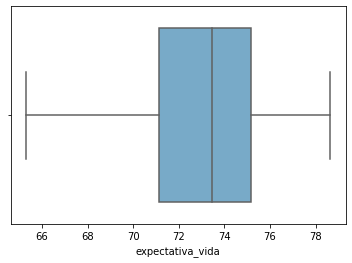

In [11]:
sns.boxplot(x=df["expectativa_vida"], palette="Blues")

In [12]:
df[['expectativa_vida','expectativa_anos_estudo','indice_gini','prop_pobreza_extrema','indice_frequencia_escolar']].corr('spearman')

,expectativa_vida,expectativa_anos_estudo,indice_gini,prop_pobreza_extrema,indice_frequencia_escolar
expectativa_vida,1.000000,0.468071,-0.406924,-0.817240,0.673751
expectativa_anos_estudo,0.468071,1.000000,-0.366153,-0.549676,0.767891
indice_gini,-0.406924,-0.366153,1.000000,0.628764,-0.517690
prop_pobreza_extrema,-0.817240,-0.549676,0.628764,1.000000,-0.765108
indice_frequencia_escolar,0.673751,0.767891,-0.517690,-0.765108,1.000000


In [13]:
X = df[['expectativa_anos_estudo','indice_gini','prop_pobreza_extrema','indice_frequencia_escolar']]
Y = df[['expectativa_vida']]

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=0)

In [15]:
parametro = {'n_neighbors':np.arange(1, 300,1)}
scoring = {'R2': 'r2', 'Erro Quadrado médio': 'neg_mean_squared_error'}

In [16]:
knn = KNeighborsRegressor(weights = 'distance',algorithm = 'brute')

In [17]:
KNN = GridSearchCV(knn, parametro, scoring= scoring, refit = 'Erro Quadrado médio', cv=10)

In [18]:
KNN.fit(X_train,y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=KNeighborsRegressor(algorithm='brute', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=5, p=2,
                                           weights='distance'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38...
       248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260,
       261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273,
       274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286,
       287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299])},
             pre_dispatch='2*n_jo

In [19]:
print(KNN.best_estimator_.n_neighbors)
print(KNN.best_score_)

255
-2.3652406047566035


In [21]:
resultados = KNN.cv_results_
resultados = pd.DataFrame.from_dict(resultados)

In [22]:
pd.set_option('display.max_columns', None)
resultados

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_R2,split1_test_R2,split2_test_R2,split3_test_R2,split4_test_R2,split5_test_R2,split6_test_R2,split7_test_R2,split8_test_R2,split9_test_R2,mean_test_R2,std_test_R2,rank_test_R2,split0_test_Erro Quadrado médio,split1_test_Erro Quadrado médio,split2_test_Erro Quadrado médio,split3_test_Erro Quadrado médio,split4_test_Erro Quadrado médio,split5_test_Erro Quadrado médio,split6_test_Erro Quadrado médio,split7_test_Erro Quadrado médio,split8_test_Erro Quadrado médio,split9_test_Erro Quadrado médio,mean_test_Erro Quadrado médio,std_test_Erro Quadrado médio,rank_test_Erro Quadrado médio
0,0.004747,0.004468,0.065961,0.008612,1,{'n_neighbors': 1},0.391313,0.374056,0.286636,0.417961,0.435830,0.410642,0.317841,0.398873,0.479419,0.420800,0.393337,0.053261,299,-4.491182,-4.123833,-5.106562,-4.617109,-4.456783,-4.085342,-4.864515,-4.222006,-3.736517,-3.920985,-4.362483,0.404503,299
1,0.006951,0.004294,0.085632,0.007865,2,{'n_neighbors': 2},0.510176,0.522804,0.440213,0.499276,0.557532,0.561325,0.460512,0.556766,0.601658,0.543054,0.525331,0.046714,298,-3.614154,-3.143859,-4.007192,-3.972065,-3.495374,-3.040828,-3.847120,-3.113050,-2.859139,-3.093363,-3.418614,0.401355,298
2,0.006475,0.003333,0.079027,0.012368,3,{'n_neighbors': 3},0.557969,0.580904,0.512959,0.565668,0.608032,0.596402,0.530169,0.598041,0.640588,0.585817,0.577655,0.035636,297,-3.261512,-2.761084,-3.486447,-3.445396,-3.096437,-2.797677,-3.350390,-2.823155,-2.579715,-2.803874,-3.040569,0.310388,297
3,0.005790,0.003498,0.092625,0.005915,4,{'n_neighbors': 4},0.591441,0.596977,0.546038,0.582450,0.620041,0.612676,0.561571,0.608011,0.648357,0.592232,0.595979,0.027645,296,-3.014541,-2.655188,-3.249651,-3.312273,-3.001569,-2.684870,-3.126466,-2.753130,-2.523953,-2.760450,-2.908209,0.255919,296
4,0.007187,0.004312,0.091859,0.012333,5,{'n_neighbors': 5},0.601730,0.605873,0.555072,0.593089,0.632044,0.630960,0.575484,0.618638,0.663950,0.606421,0.608326,0.029112,295,-2.938623,-2.596585,-3.184985,-3.227876,-2.906746,-2.558130,-3.027248,-2.678490,-2.412028,-2.664395,-2.819511,0.263305,295
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,0.008495,0.002183,0.138432,0.003589,295,{'n_neighbors': 295},0.655233,0.685826,0.633968,0.656041,0.678398,0.683757,0.662353,0.680776,0.709808,0.669419,0.671558,0.019892,77,-2.543851,-2.069834,-2.620215,-2.728503,-2.540563,-2.192148,-2.407780,-2.242068,-2.082878,-2.237921,-2.366576,0.221301,80
295,0.006437,0.002456,0.139440,0.005268,296,{'n_neighbors': 296},0.655159,0.685767,0.633896,0.656062,0.678356,0.683793,0.662303,0.680734,0.709750,0.669373,0.671519,0.019896,85,-2.544395,-2.070226,-2.620724,-2.728335,-2.540901,-2.191896,-2.408140,-2.242358,-2.083298,-2.238230,-2.366850,0.221288,89
296,0.005984,0.001156,0.142667,0.002548,297,{'n_neighbors': 297},0.655217,0.685829,0.633905,0.656042,0.678423,0.683755,0.662227,0.680718,0.709689,0.669252,0.671506,0.019888,90,-2.543973,-2.069820,-2.620665,-2.728495,-2.540365,-2.192160,-2.408677,-2.242471,-2.083732,-2.239047,-2.366940,0.221165,93
297,0.007370,0.001537,0.136241,0.008159,298,{'n_neighbors': 298},0.655155,0.685888,0.633848,0.656029,0.678393,0.683759,0.662183,0.680777,0.709742,0.669211,0.671499,0.019924,93,-2.544427,-2.069426,-2.621071,-2.728601,-2.540605,-2.192133,-2.408994,-2.242056,-2.083353,-2.239326,-2.366999,0.221401,96


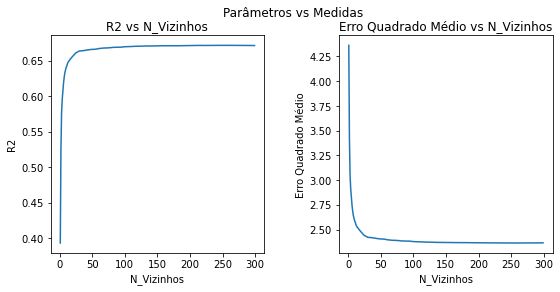

In [24]:
fig, axs = plt.subplots(1,2, figsize=(9,4))
axs[0].plot(resultados['param_n_neighbors'], resultados['mean_test_R2'])
axs[0].set(xlabel='N_Vizinhos', ylabel='R2',
       title='R2 vs N_Vizinhos')
axs[1].plot(resultados['param_n_neighbors'], abs(resultados['mean_test_Erro Quadrado médio']))
axs[1].set(xlabel='N_Vizinhos', ylabel='Erro Quadrado Médio',
       title='Erro Quadrado Médio vs N_Vizinhos')
fig.suptitle('Parâmetros vs Medidas') 
plt.subplots_adjust(wspace=0.35,hspace=1)

In [25]:
previsoes = KNN.predict(X_test)
erro = mean_squared_error(y_test, previsoes)
print("Erro Quadrado Médio:", erro)
r2 = r2_score(y_test, previsoes)
print("R2:", r2)

Erro Quadrado Médio: 2.429386297162144
R2: 0.6584966934532894


# Classificação